In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os
import glob
from collections import Counter

In [2]:
annotations = json.load(open(os.path.join('trainval','annotations','bbox-annotations.json'),'r'))
annotations.keys()

dict_keys(['images', 'annotations', 'categories', 'licenses'])

In [3]:
# Number of images and annotations
print(f'No. of images: {len(annotations["images"])}')
print(f'No. of annotations: {len(annotations["annotations"])}')

No. of images: 2239
No. of annotations: 16772


In [5]:
classes = []
for obj in annotations['annotations']:
    classes.append(obj['category_id'])
Counter(classes)

Counter({1: 10800, 2: 5972})

In [32]:
# Number of images in folder
images = glob.glob(os.path.join('trainval','images','*.jpg'))
len(images)

2221

In [33]:
# Categories
annotations['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'none'},
 {'id': 2, 'name': 'car', 'supercategory': 'none'}]

In [34]:
# Images
annotations['images'][0]

{'file_name': 'image_000000001.jpg',
 'width': 1024,
 'height': 768,
 'id': 0,
 'license': 1}

In [35]:
# Annotations
annotations['annotations'][0]

{'category_id': 1,
 'image_id': 0,
 'segmentation': [],
 'iscrowd': 0,
 'bbox': [846, 145, 146, 477],
 'area': 0.08855438232421875,
 'id': 0,
 'license': 2}

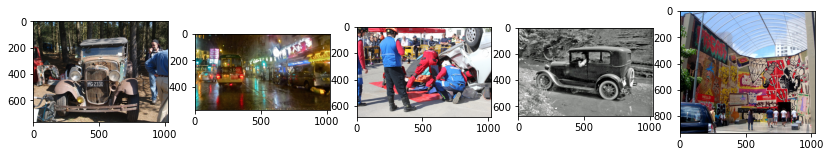

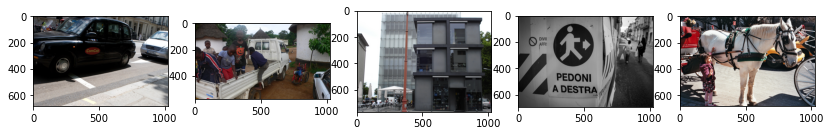

In [36]:
# plot and show images
for i in range(0,10,5):
    plt.subplots(1,5,figsize=(14,14))
    img = []
    for j in range(5):
        img = cv2.cvtColor(cv2.imread(images[i+j]),cv2.COLOR_BGR2RGB)
        plt.subplot(151+j)
        plt.imshow(img)
    plt.show()

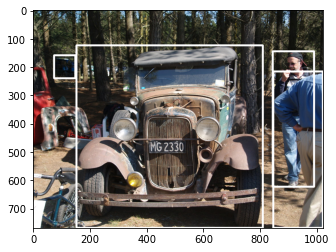

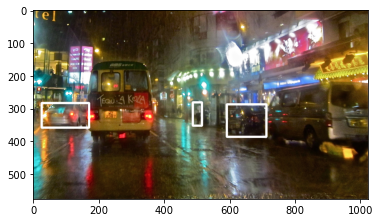

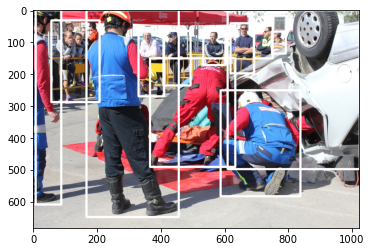

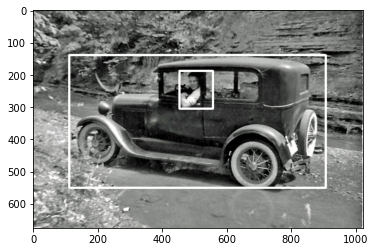

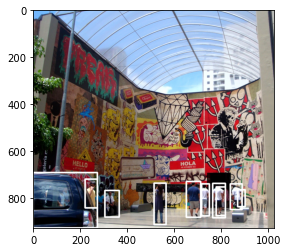

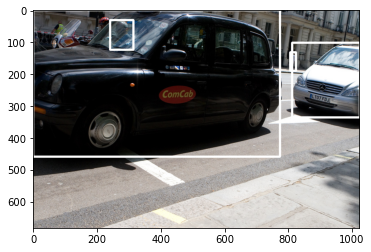

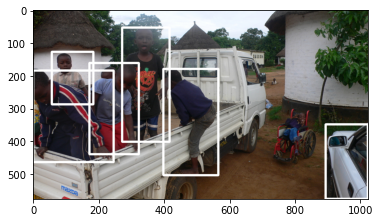

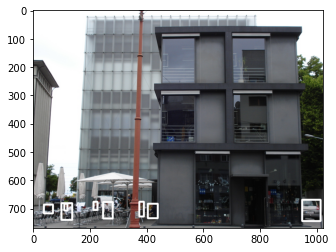

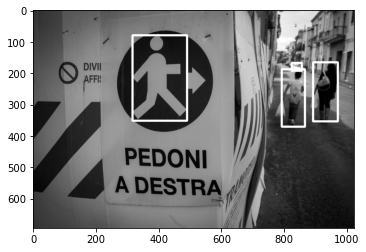

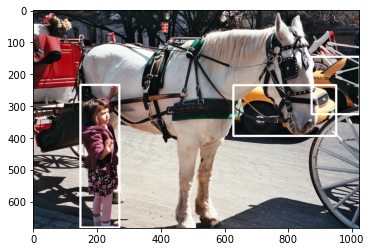

In [37]:
# plot bboxes
for x in range(10):
    img = annotations['images'][x]['file_name']
    img_id = annotations['images'][x]['id']
    annots = [i['bbox'] for i in annotations['annotations'] if i['image_id']==img_id]
    image = cv2.cvtColor(cv2.imread('trainval/images/'+img),cv2.COLOR_BGR2RGB)
    for x,y,w,h in annots:
        image = cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,255), 5)
    plt.imshow(image)
    plt.show()

# In some of the images we can see that Buses, Vans and Trucks are not included in the cars category.
# These can be potential False Positives, specially Vans.

In [38]:
# Width and height of images
w = []
h = []
for img in annotations['images']:
    w.append(img['width'])
    h.append(img['height'])
w = np.array(w)
h = np.array(h)

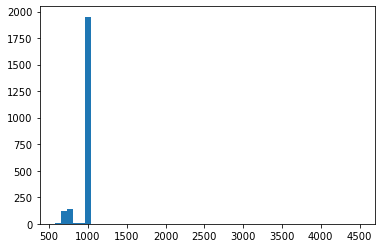

Mean: 988.5176418043769, Median: 1024.0, Std: 123.33108678999983
Min: 575, Max: 4496
12
[ 629  634  576  652  577  575  590  642  577 4496  601  576]


In [39]:
# Distribution of image width
plt.hist(w,bins=50)
plt.show()
print(f'Mean: {w.mean()}, Median: {np.median(w)}, Std: {np.std(w)}')
print(f'Min: {w.min()}, Max: {w.max()}')

lo_w = np.median(w)-3*np.std(w)
hi_w = np.median(w)+3*np.std(w)
outliers = w[~np.logical_and(lo_w<=w,w<=hi_w)]
print(len(outliers))
print(outliers)

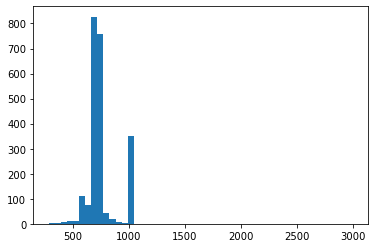

Mean: 759.7458686913801, Median: 765.0, Std: 139.74162081938846
Min: 282, Max: 3000
7
[ 336  321  296  282  312  343 3000]


In [40]:
# Distribution of image height
plt.hist(h,bins=50)
plt.show()
print(f'Mean: {h.mean()}, Median: {np.median(h)}, Std: {np.std(h)}')
print(f'Min: {h.min()}, Max: {h.max()}')

lo_h = np.median(h)-3*np.std(h)
hi_h = np.median(h)+3*np.std(h)
outliers = h[~np.logical_and(lo_h<=h,h<=hi_h)]
print(len(outliers))
print(outliers)